# Data Cleaning of DEED Data

We will be importing and cleaning the data from [Deed Lab ](https://www.deeddataset.com/#/download)

In [ ]:
import pandas as pd
from statsmodels.formula.api import ols
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
from wordcloud import WordCloud
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
df_emotion = pd.read_excel("https://www.deeddataset.com/static/Emotional_ratings_excel_filesfiles.xlsx")
df_video = pd.read_excel("https://www.deeddataset.com/static/Video_list.xlsx")


df_emotion = df_emotion.fillna(method='ffill')

<ipython-input-2-a063ef453954>:5: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_emotion = df_emotion.fillna(method='ffill')


In [ ]:
df_emotion.info()
df_emotion.describe(include = 'all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 464 entries, 0 to 463
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Date                    464 non-null    object
 1   PSG_number              464 non-null    object
 2   Online_id               464 non-null    object
 3   Dream_content           464 non-null    object
 4   Dream_emotion           464 non-null    object
 5   REM_period_start_time   464 non-null    object
 6   End_time_of_REM_period  464 non-null    object
dtypes: object(7)
memory usage: 25.5+ KB


,Date,PSG_number,Online_id,Dream_content,Dream_emotion,REM_period_start_time,End_time_of_REM_period
count,464,464,464,464,464,464,464
unique,68,68,68,454,5,462,454
top,20220528-20220529,00000437-115043,S0392,Nothing,calm,08:01:47,07:11:38
freq,15,15,15,5,223,2,2


In [ ]:
df_video.info()

df_video.describe(include = 'all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80 entries, 0 to 79
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Online_id           80 non-null     object
 1   Viewing_date        80 non-null     int64 
 2   Video_name          80 non-null     object
 3   Video_duration      80 non-null     object
 4   Video_Introduction  80 non-null     object
 5   Video_type          80 non-null     object
dtypes: int64(1), object(5)
memory usage: 3.9+ KB


,Online_id,Viewing_date,Video_name,Video_duration,Video_Introduction,Video_type
count,80,8.000000e+01,80,80,80,80
unique,70,NaN,11,12,11,3
top,S0342,NaN,"Art Collection, 2006",84mins,The Art Selection was produced by the BBC. It ...,Positive
freq,2,NaN,11,11,11,27
mean,NaN,2.022031e+07,NaN,NaN,NaN,NaN
std,NaN,1.032533e+03,NaN,NaN,NaN,NaN
min,NaN,2.021122e+07,NaN,NaN,NaN,NaN
25%,NaN,2.022032e+07,NaN,NaN,NaN,NaN
50%,NaN,2.022042e+07,NaN,NaN,NaN,NaN
75%,NaN,2.022051e+07,NaN,NaN,NaN,NaN


In [ ]:
df_combined = pd.merge(df_emotion, df_video, left_on='Online_id', right_on='Online_id', how='inner')
df_combined['Dream_emotion'].unique()
df_combined.head()

,Date,PSG_number,Online_id,Dream_content,Dream_emotion,REM_period_start_time,End_time_of_REM_period,Viewing_date,Video_name,Video_duration,Video_Introduction,Video_type
0,20220306-0307,00000339-115043,S0151,I seemed to have a dream that I went to anothe...,extremely happy,04:59:39,05:02:49,20220306,"The Silence of the Lambs, 1991",114min,A young F.B.I. cadet must receive the help of ...,Negative
1,20220306-0307,00000339-115043,S0151,"I think I was doing some experiments, too",calm,06:23:49,06:27:49,20220306,"The Silence of the Lambs, 1991",114min,A young F.B.I. cadet must receive the help of ...,Negative
2,20220306-0307,00000339-115043,S0151,It was in the countryside,calm,06:33:39,06:40:19,20220306,"The Silence of the Lambs, 1991",114min,A young F.B.I. cadet must receive the help of ...,Negative
3,20220306-0307,00000339-115043,S0151,Don't remember,relatively happy,06:44:09,06:50:09,20220306,"The Silence of the Lambs, 1991",114min,A young F.B.I. cadet must receive the help of ...,Negative
4,20220306-0307,00000339-115043,S0151,"20 years later, what was I doing",calm,07:34:39,07:39:39,20220306,"The Silence of the Lambs, 1991",114min,A young F.B.I. cadet must receive the help of ...,Negative


In [ ]:
from scipy.stats import spearmanr, kendalltau


emotion_map = {'extremely happy': 1, 'relatively happy': 2, 'calm': 3, 'relatively unhappy': 4,'extremely unhappy':5}
rating_map = {'Negative': 1, 'Neutral': 2, 'Positive': 3}

df_combined['emotion_num'] = df_combined['Dream_emotion'].map(emotion_map)
df_combined['rating_num'] = df_combined['Video_type'].map(rating_map)

df_na_dropped = df_combined.dropna()

spearman_corr, spearman_p = spearmanr(df_na_dropped['emotion_num'], df_na_dropped['rating_num'])
kendall_corr, kendall_p = kendalltau(df_na_dropped['emotion_num'], df_na_dropped['rating_num'])

# Display results
print("Spearman's Rank Correlation:")
print(f"Correlation: {spearman_corr:.3f}, P-value: {spearman_p:.5f}")

print("\nKendall's Tau Correlation:")
print(f"Correlation: {kendall_corr:.3f}, P-value: {kendall_p:.5f}")

Spearman's Rank Correlation:
Correlation: 0.009, P-value: 0.85202

Kendall's Tau Correlation:
Correlation: 0.008, P-value: 0.84566


# Text processing

In [ ]:
def sentence_count(text):
    return len(sent_tokenize(text))

def token_count(text):
    return len(word_tokenize(text))

import nltk
nltk.download('punkt_tab')

df_emotion

df_emotion['sent_count'] = df_emotion['Dream_content'].apply(sentence_count)

df_emotion['word_count'] = df_emotion['Dream_content'].apply(token_count)

emotion_map = {'extremely happy': 1, 'relatively happy': 2, 'calm': 3, 'relatively unhappy': 4,'extremely unhappy':5}
rating_map = {'Negative': 1, 'Neutral': 2, 'Positive': 3}

df_emotion['emotion_num'] = df_emotion['Dream_emotion'].map(emotion_map)

df_emotion = df_emotion.dropna()

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


# *Homework Due 10/31/24*
Describe the various emotions related to the data set:

df_emotion

- How many emotions using histrogram function
- Describe number of full patients you can use in the data set using .info and .describe in pandas

Refer to documentation here https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.info.html

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.describe.html

Watch video on word vectors:
https://www.youtube.com/watch?v=eKvbYOc2rOs


**Write a formal hypothesis for your paper. Try to explain what is the dependent variable and what is the independent varaible.**

https://en.wikipedia.org/wiki/Dependent_and_independent_variables

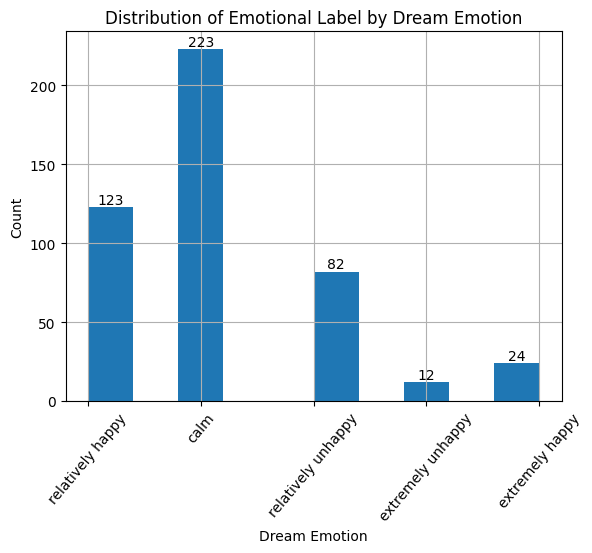

In [ ]:
import matplotlib.pyplot as plt

# Create the histogram
ax = df_emotion.Dream_emotion.hist()

# Add the counts on top of the bars
for patch in ax.patches:
    # Get the height of each bar (i.e., the count)
    height = patch.get_height()
    if height > 0:  # Only label bars with counts
        ax.annotate(f'{int(height)}',
                    (patch.get_x() + patch.get_width() / 2, height),
                    ha='center', va='bottom', fontsize=10, color='black')

# Customize the plot
plt.xticks(rotation=50)
plt.title('Distribution of Emotional Label by Dream Emotion')
plt.xlabel('Dream Emotion')
plt.ylabel('Count')

# Show the plot
plt.show()

Text(0, 0.5, 'Frequency')

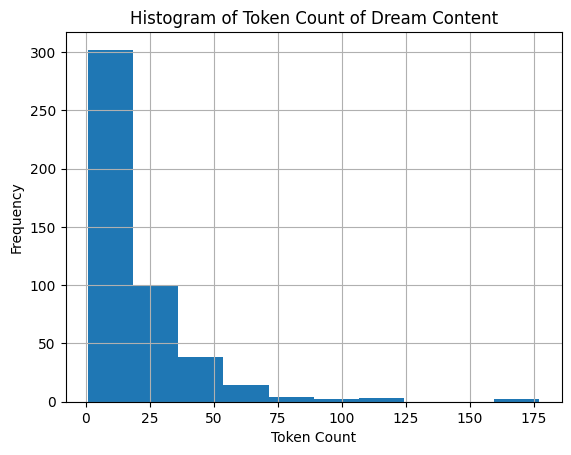

In [ ]:
df_emotion.word_count.hist()
plt.title('Histogram of Token Count of Dream Content')
plt.xlabel('Token Count')
plt.ylabel('Frequency')

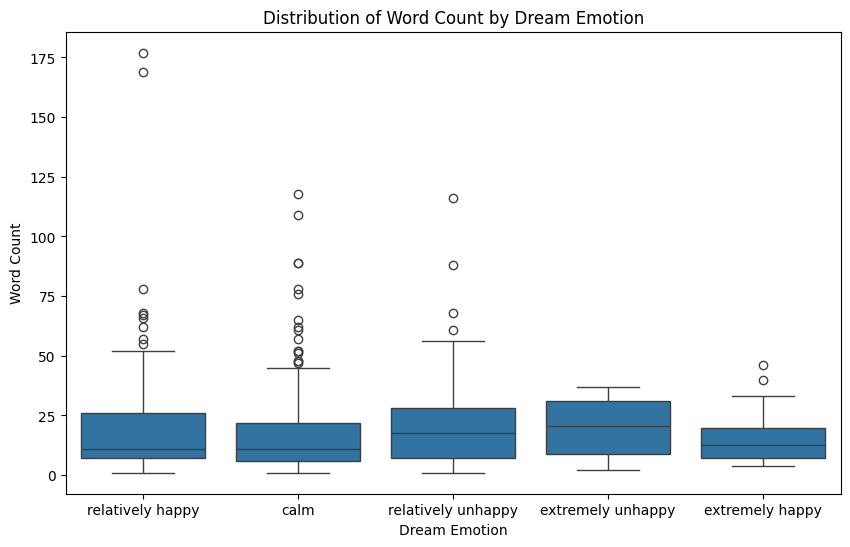

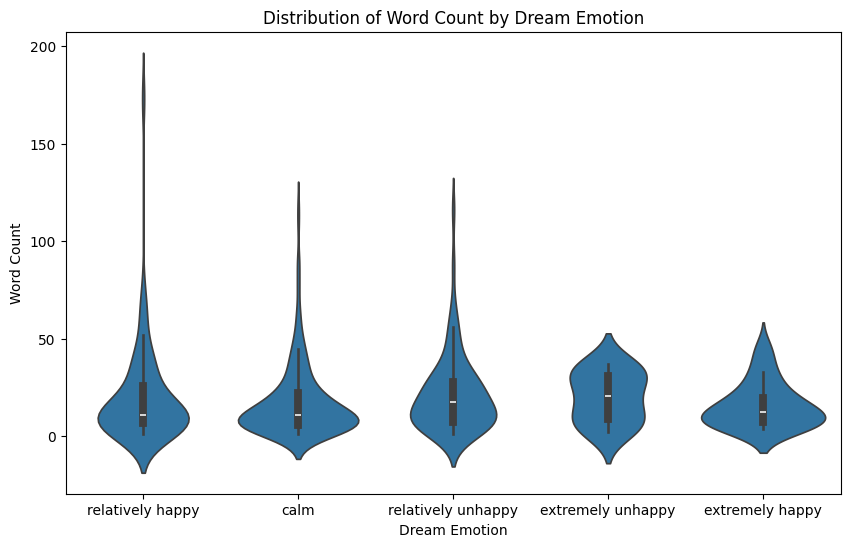

In [ ]:
# prompt: df_emotion make a graph with the sent_count column which is numeric and the Dream_emotion which is categorical

import matplotlib.pyplot as plt
import seaborn as sns

# Boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Dream_emotion', y='word_count', data=df_emotion)
plt.xlabel('Dream Emotion')
plt.ylabel('Word Count')
plt.title('Distribution of Word Count by Dream Emotion')
plt.show()

# Alternatively, using a Violin Plot for more detail
plt.figure(figsize=(10, 6))
sns.violinplot(x='Dream_emotion', y='word_count', data=df_emotion)
plt.xlabel('Dream Emotion')
plt.ylabel('Word Count')
plt.title('Distribution of Word Count by Dream Emotion')
plt.show()

In [ ]:
# Group by 'group_column'
grouped = df_emotion.groupby('Dream_emotion')['word_count']

# Calculate mean and median for each group
mean_median_summary = grouped.agg(['mean', 'median']).reset_index()

# Function to calculate outliers
def calculate_outliers(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = series[(series < lower_bound) | (series > upper_bound)]
    return outliers

# Apply outlier detection
outliers = grouped.apply(calculate_outliers).reset_index(level=0, drop=True)
outlier_summary = outliers.groupby(df_emotion['Dream_emotion']).agg(['mean', 'median']).dropna().reset_index()

print("Mean and Median Summary:")
print(mean_median_summary)
print("\nOutliers Summary:")
print(outlier_summary)

Mean and Median Summary:
        Dream_emotion       mean  median
0                calm  17.408072    11.0
1     extremely happy  15.916667    12.5
2   extremely unhappy  20.166667    20.5
3    relatively happy  20.065041    11.0
4  relatively unhappy  21.560976    17.5

Outliers Summary:
        Dream_emotion       mean  median
0                calm  68.875000    61.5
1     extremely happy  43.000000    43.0
2    relatively happy  88.777778    67.0
3  relatively unhappy  83.250000    78.0


In [ ]:
df_emotion.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 464 entries, 0 to 463
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Date                    464 non-null    object
 1   PSG_number              464 non-null    object
 2   Online_id               464 non-null    object
 3   Dream_content           464 non-null    object
 4   Dream_emotion           464 non-null    object
 5   REM_period_start_time   464 non-null    object
 6   End_time_of_REM_period  464 non-null    object
 7   sent_count              464 non-null    int64 
 8   word_count              464 non-null    int64 
 9   emotion_num             464 non-null    int64 
dtypes: int64(3), object(7)
memory usage: 36.4+ KB


In [ ]:
df_emotion.describe().to_latex()
df_emotion.describe()

,sent_count,word_count,emotion_num
count,464.000000,464.000000,464.000000
mean,1.538793,18.840517,2.859914
std,1.242951,20.544226,0.856804
min,1.000000,1.000000,1.000000
25%,1.000000,6.000000,2.000000
50%,1.000000,12.000000,3.000000
75%,2.000000,24.250000,3.000000
max,13.000000,177.000000,5.000000


In [ ]:
df_video.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80 entries, 0 to 79
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Online_id           80 non-null     object
 1   Viewing_date        80 non-null     int64 
 2   Video_name          80 non-null     object
 3   Video_duration      80 non-null     object
 4   Video_Introduction  80 non-null     object
 5   Video_type          80 non-null     object
dtypes: int64(1), object(5)
memory usage: 3.9+ KB


In [ ]:
df_emotion.describe()

,sent_count,word_count,emotion_num
count,464.000000,464.000000,464.000000
mean,1.538793,18.840517,2.859914
std,1.242951,20.544226,0.856804
min,1.000000,1.000000,1.000000
25%,1.000000,6.000000,2.000000
50%,1.000000,12.000000,3.000000
75%,2.000000,24.250000,3.000000
max,13.000000,177.000000,5.000000


# Regression Analysis


In [ ]:
df_combined = pd.merge(df_emotion, df_video, left_on='Online_id', right_on='Online_id', how='inner')
df_combined['Dream_emotion'].unique()
df_combined.head()

,Date,PSG_number,Online_id,Dream_content,Dream_emotion,REM_period_start_time,End_time_of_REM_period,sent_count,word_count,emotion_num,Viewing_date,Video_name,Video_duration,Video_Introduction,Video_type
0,20220306-0307,00000339-115043,S0151,I seemed to have a dream that I went to anothe...,extremely happy,04:59:39,05:02:49,1,19,1,20220306,"The Silence of the Lambs, 1991",114min,A young F.B.I. cadet must receive the help of ...,Negative
1,20220306-0307,00000339-115043,S0151,"I think I was doing some experiments, too",calm,06:23:49,06:27:49,1,9,3,20220306,"The Silence of the Lambs, 1991",114min,A young F.B.I. cadet must receive the help of ...,Negative
2,20220306-0307,00000339-115043,S0151,It was in the countryside,calm,06:33:39,06:40:19,1,5,3,20220306,"The Silence of the Lambs, 1991",114min,A young F.B.I. cadet must receive the help of ...,Negative
3,20220306-0307,00000339-115043,S0151,Don't remember,relatively happy,06:44:09,06:50:09,1,3,2,20220306,"The Silence of the Lambs, 1991",114min,A young F.B.I. cadet must receive the help of ...,Negative
4,20220306-0307,00000339-115043,S0151,"20 years later, what was I doing",calm,07:34:39,07:39:39,1,8,3,20220306,"The Silence of the Lambs, 1991",114min,A young F.B.I. cadet must receive the help of ...,Negative


In [ ]:
from statsmodels.formula.api import ols

model = ols('emotion_num ~ C(Video_type)', data=df_combined)
fitted_model = model.fit()
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            emotion_num   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.004
Method:                 Least Squares   F-statistic:                    0.2311
Date:                Sat, 04 Jan 2025   Prob (F-statistic):              0.794
Time:                        03:04:21   Log-Likelihood:                -517.54
No. Observations:                 412   AIC:                             1041.
Df Residuals:                     409   BIC:                             1053.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                     2.7891      0.070     39.649      0.000       2.651       2.927
C(Video_type)[T.Neutral]      0.0605      0.102      0.593      0.554      -0.140       0.261
C(Video_type)[T.Positive]    -0.0012      0.102     -0.012      0.990      -0.202       0.200
==============================================================================
Omnibus:                        0.310   Durbin-Watson:                   1.461
Prob(Omnibus):                  0.857   Jarque-Bera (JB):                0.391
Skew:                          -0.060   Prob(JB):                        0.823
Kurtosis:                       2.909   Cond. No.                         3.63
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
from statsmodels.miscmodels.ordinal_model import OrderedModel



# Regression analysis

Does the complexity of the dream have anything to do with the emotion of the dream?


*   Dependent variable = Emotion
*   Independent variable = Dream complexity


In [ ]:
model = ols('emotion_num ~ sent_count', data=df_emotion)
fitted_model = model.fit()
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            emotion_num   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     2.081
Date:                Sat, 04 Jan 2025   Prob (F-statistic):              0.150
Time:                        03:04:29   Log-Likelihood:                -585.13
No. Observations:                 464   AIC:                             1174.
Df Residuals:                     462   BIC:                             1183.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.7889      0.063     44.080      0.000       2.665       2.913
sent_count     0.0462      0.032      1.443      0.150      -0.017       0.109
==============================================================================
Omnibus:                        0.012   Durbin-Watson:                   1.736
Prob(Omnibus):                  0.994   Jarque-Bera (JB):                0.030
Skew:                           0.012   Prob(JB):                        0.985
Kurtosis:                       2.969   Cond. No.                         3.68
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<ipython-input-20-9b5b79343468>:16: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y_values = fitted_model.params[0] + fitted_model.params[1] * x_values  # Intercept + Slope*x


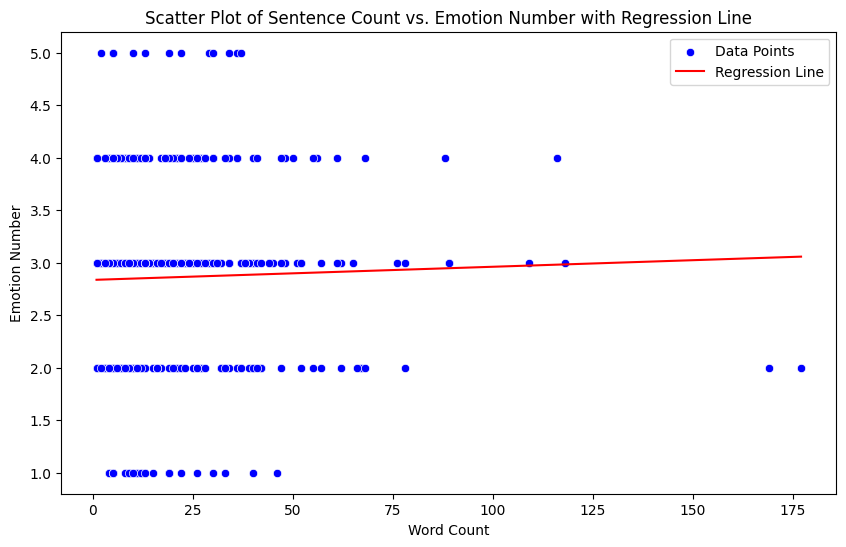

In [ ]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
model = ols('emotion_num ~ word_count', data=df_emotion)
fitted_model = model.fit()
fitted_model.summary()

plt.figure(figsize=(10, 6))

# Scatter plot of actual data points
sns.scatterplot(x='word_count', y='emotion_num', data=df_emotion, color='blue', label='Data Points')

# Plot the regression line
# Generate predictions using the fitted model
x_values = np.linspace(df_emotion['word_count'].min(), df_emotion['word_count'].max(), 100)
y_values = fitted_model.params[0] + fitted_model.params[1] * x_values  # Intercept + Slope*x

plt.plot(x_values, y_values, color='red', label='Regression Line')

# Add labels and title
plt.xlabel('Word Count')
plt.ylabel('Emotion Number')
plt.title('Scatter Plot of Sentence Count vs. Emotion Number with Regression Line')
plt.legend()
plt.show()

                            OLS Regression Results                            
Dep. Variable:            emotion_num   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                    0.4166
Date:                Sat, 04 Jan 2025   Prob (F-statistic):              0.519
Time:                        03:04:41   Log-Likelihood:                -585.97
No. Observations:                 464   AIC:                             1176.
Df Residuals:                     462   BIC:                             1184.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.8363      0.054     52.495      0.0

<ipython-input-21-6aeebfe22039>:35: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y_values = fitted_model.params[0] + fitted_model.params[1] * x_values  # Intercept + Slope*x


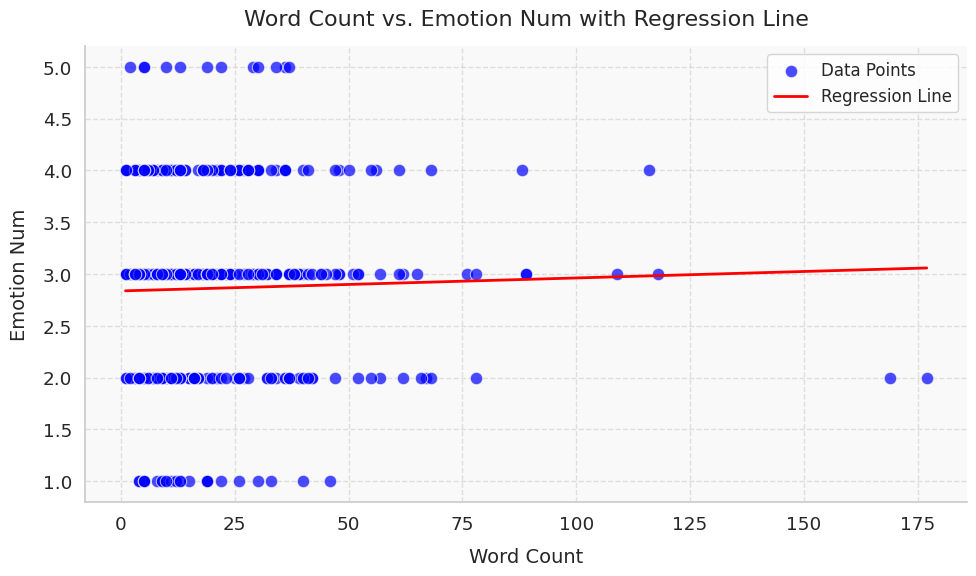

In [ ]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.formula.api import ols

def regression_plot(data, x, y, figsize=(10, 6), scatter_color='blue', line_color='red', theme='whitegrid', font_scale=1.2):
    """
    Create a scatter plot with a regression line for specified x and y variables with enhanced visuals.

    Parameters:
        data (DataFrame): The DataFrame containing the data.
        x (str): The name of the column to use for the x-axis.
        y (str): The name of the column to use for the y-axis.
        figsize (tuple): The size of the plot (width, height).
        scatter_color (str): Color for the scatter plot points.
        line_color (str): Color for the regression line.
        theme (str): Seaborn theme for the plot (e.g., 'whitegrid', 'darkgrid', 'ticks').
        font_scale (float): Scale factor for the font size.

    Returns:
        None
    """
    # Apply seaborn theme and font scale
    sns.set_theme(style=theme)
    sns.set_context("notebook", font_scale=font_scale)

    # Fit the regression model
    formula = f'{y} ~ {x}'
    model = ols(formula, data=data)
    fitted_model = model.fit()
    print(fitted_model.summary())  # Display the summary of the regression model

    # Generate regression line values
    x_values = np.linspace(data[x].min(), data[x].max(), 100)
    y_values = fitted_model.params[0] + fitted_model.params[1] * x_values  # Intercept + Slope*x

    # Plot the data
    plt.figure(figsize=figsize)

    # Scatter plot of actual data points
    sns.scatterplot(x=x, y=y, data=data, color=scatter_color, s=80, alpha=0.7, label='Data Points')

    # Regression line
    plt.plot(x_values, y_values, color=line_color, linewidth=2, label='Regression Line')

    # Customize the plot
    plt.xlabel(x.replace('_', ' ').title(), fontsize=14, labelpad=10)
    plt.ylabel(y.replace('_', ' ').title(), fontsize=14, labelpad=10)
    plt.title(f'{x.replace("_", " ").title()} vs. {y.replace("_", " ").title()} with Regression Line',
              fontsize=16, pad=15)
    plt.legend(fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.6)

    # Add a subtle background gradient for style
    plt.gca().set_facecolor('#f9f9f9')
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)

    # Show the plot
    plt.tight_layout()
    plt.show()

# Example usage
regression_plot(data=df_emotion, x='word_count', y='emotion_num')


# Homework Due 11/7/2024

Explain the graph above showing there is no relationship between emotion of the dream and the complexity of the dream context. Explain why you think the sentence count represents complexity of the dream.

Use the model analysis and P-value to justify

Run the analysis before next week.

# Analysis for 11/7/2024 time:


1.   Look at word count and run model
2.   Process data for dream content topics
3.   Look at video content relationship with dream content



In [ ]:
import pandas as pd
from statsmodels.formula.api import ols
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
from wordcloud import WordCloud
import nltk
nltk.download('punkt')

df_emotion = pd.read_excel("https://www.deeddataset.com/static/Emotional_ratings_excel_filesfiles.xlsx", index_col=[0,1,2])

df_video = pd.read_excel("https://www.deeddataset.com/static/Video_list.xlsx")


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
def sentence_count(text):
    return len(sent_tokenize(text))

def word_count(text):
    return len(word_tokenize(text))

df_emotion['word_count'] = df_emotion['Dream_content'].apply(word_count)

In [ ]:
model = ols('emotion_num ~ word_count', data=df_emotion)
fitted_model = model.fit()
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            emotion_num   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                    0.4166
Date:                Sat, 04 Jan 2025   Prob (F-statistic):              0.519
Time:                        03:05:11   Log-Likelihood:                -585.97
No. Observations:                 464   AIC:                             1176.
Df Residuals:                     462   BIC:                             1184.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.8363      0.054     52.495      0.000       2.730       2.943
word_count     0.0013      0.002      0.645      0.519      -0.003       0.005
==============================================================================
Omnibus:                        0.045   Durbin-Watson:                   1.743
Prob(Omnibus):                  0.978   Jarque-Bera (JB):                0.039
Skew:                           0.021   Prob(JB):                        0.981
Kurtosis:                       2.985   Cond. No.                         37.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<ipython-input-27-51796ff52149>:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y_values = fitted_model.params[0] + fitted_model.params[1] * x_values  # Intercept + Slope*x


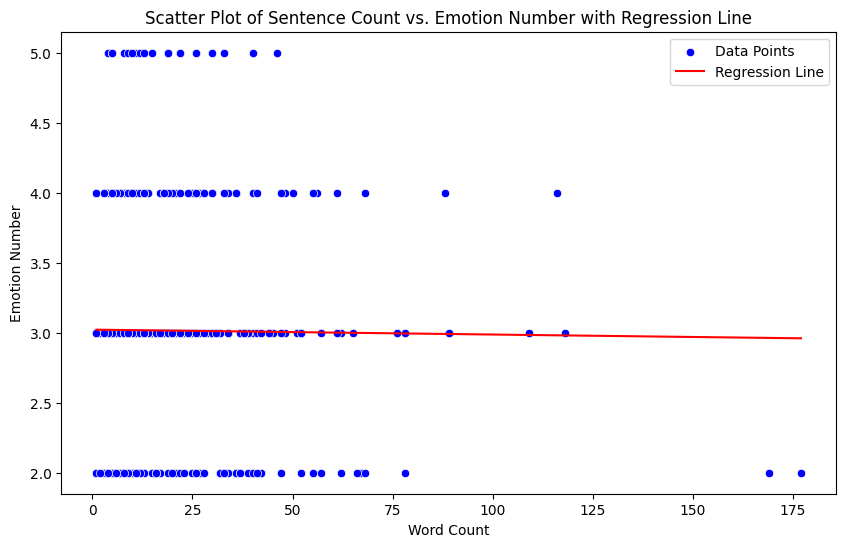

In [ ]:
model = ols('emotion_num ~ word_count', data=df_emotion)
fitted_model = model.fit()
fitted_model.summary()

plt.figure(figsize=(10, 6))

# Scatter plot of actual data points
sns.scatterplot(x='word_count', y='emotion_num', data=df_emotion, color='blue', label='Data Points')

# Plot the regression line
# Generate predictions using the fitted model
x_values = np.linspace(df_emotion['word_count'].min(), df_emotion['word_count'].max(), 100)
y_values = fitted_model.params[0] + fitted_model.params[1] * x_values  # Intercept + Slope*x

plt.plot(x_values, y_values, color='red', label='Regression Line')

# Add labels and title
plt.xlabel('Word Count')
plt.ylabel('Emotion Number')
plt.title('Scatter Plot of Sentence Count vs. Emotion Number with Regression Line')
plt.legend()
plt.show()

# 11/11 Text Similiary


Goals for Today - Outline your paper and the expirements you are interested in running.



In [ ]:
from sentence_transformers import SentenceTransformer, util

/usr/local/lib/python3.10/dist-packages/sentence_transformers/cross_encoder/CrossEncoder.py:13: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm, trange


In [ ]:
# Load a pre-trained Sentence-BERT model
model = SentenceTransformer('paraphrase-MiniLM-L6-v2')

# Define the two sentences
text1 = "I love machine learning and AI."
text2 = "I love coding"

# Encode the sentences into embedding vectors
embedding1 = model.encode(text1, convert_to_tensor=True)
embedding2 = model.encode(text2, convert_to_tensor=True)

# Compute cosine similarity
similarity = util.cos_sim(embedding1, embedding2).item()

print("Similarity Score:", similarity)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/229 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/122 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/3.73k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/314 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Similarity Score: 0.46720921993255615


In [ ]:
df_combined.to_csv('combined.csv')

In [ ]:
text1

'I love machine learning and AI.'

In [ ]:
# Define the two sentences
text1 = df_combined.Dream_content[0]
text2 = df_combined.Video_Introduction[0]

# Encode the sentences into embedding vectors
embedding1 = model.encode(text1, convert_to_tensor=True)
embedding2 = model.encode(text2, convert_to_tensor=True)

# Compute cosine similarity
similarity = util.cos_sim(embedding1, embedding2).item()

print("Similarity Score:", similarity)

Similarity Score: 0.14558613300323486


In [ ]:
def get_embedding(c):
  encoding = model.encode(c['Dream_content'])
  return encoding

def get_embedding_video(c):
  encoding = model.encode(c['Video_Introduction'])
  return encoding

def get_similarity(c):
  similarity = util.cos_sim(c['dream_embedding'], c['vid_embedding']).item()
  return similarity

In [ ]:
from tqdm import tqdm
tqdm.pandas()
df_combined['dream_embedding'] = df_combined.progress_apply(get_embedding, axis=1)
df_combined['vid_embedding'] = df_combined.progress_apply(get_embedding_video, axis=1)
df_combined['similarity'] = df_combined.progress_apply(get_similarity, axis=1)

100%|██████████| 412/412 [00:07<00:00, 51.67it/s]


<Axes: >

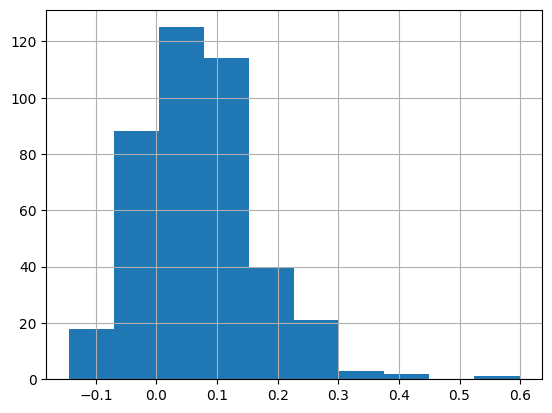

In [ ]:
df_combined['similarity'].hist()

In [ ]:
df_combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412 entries, 0 to 411
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Date                    412 non-null    object 
 1   PSG_number              412 non-null    object 
 2   Online_id               412 non-null    object 
 3   Dream_content           412 non-null    object 
 4   Dream_emotion           412 non-null    object 
 5   REM_period_start_time   412 non-null    object 
 6   End_time_of_REM_period  412 non-null    object 
 7   Viewing_date            412 non-null    int64  
 8   Video_name              412 non-null    object 
 9   Video_duration          412 non-null    object 
 10  Video_Introduction      412 non-null    object 
 11  Video_type              412 non-null    object 
 12  emotion_num             412 non-null    int64  
 13  rating_num              412 non-null    int64  
 14  dream_embedding         412 non-null    ob

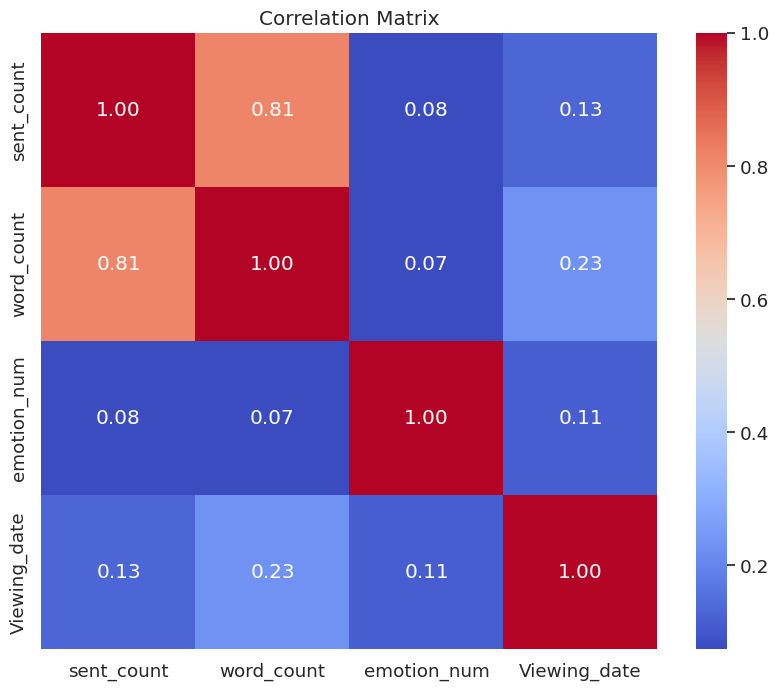

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



# Select only numerical columns
numerical_columns = df_combined.select_dtypes(include=['number'])

# Compute the correlation matrix
correlation_matrix = numerical_columns.corr()

# Plot the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(
    correlation_matrix,
    annot=True,
    fmt='.2f',
    cmap='coolwarm',
    cbar=True,
    square=True
)
plt.title("Correlation Matrix")
plt.show()

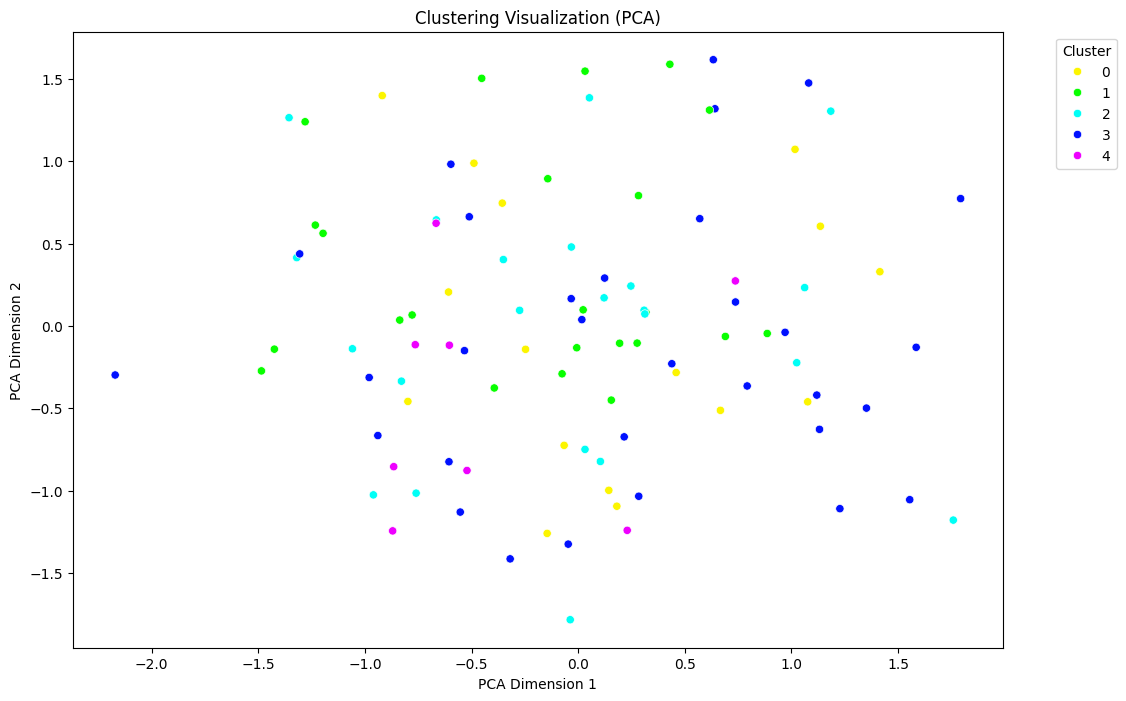

In [ ]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns

# Example DataFrame structure for demonstration
np.random.seed(42)
embedding_data = np.random.rand(100, 362)  # Replace with your actual embedding data
df = pd.DataFrame(embedding_data, columns=[f'dim_{i}' for i in range(362)])

# Perform K-Means clustering
num_clusters = 5  # Adjust based on your data
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
df['cluster'] = kmeans.fit_predict(df)

# Dimensionality reduction for visualization
# Option 1: PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(df.iloc[:, :-1])  # Exclude 'cluster' column

# Option 2: t-SNE (optional for non-linear projections, uncomment if needed)
# tsne = TSNE(n_components=2, random_state=42, perplexity=30, n_iter=300)
# tsne_result = tsne.fit_transform(df.iloc[:, :-1])

# Add reduced dimensions to DataFrame
df['pca_1'] = pca_result[:, 0]
df['pca_2'] = pca_result[:, 1]
# If using t-SNE
# df['tsne_1'] = tsne_result[:, 0]
# df['tsne_2'] = tsne_result[:, 1]

# Visualization
plt.figure(figsize=(12, 8))
sns.scatterplot(
    x='pca_1',
    y='pca_2',
    hue='cluster',
    palette=sns.color_palette('hsv', num_clusters),
    data=df,
    legend="full"
)
plt.title('Clustering Visualization (PCA)')
plt.xlabel('PCA Dimension 1')
plt.ylabel('PCA Dimension 2')
plt.legend(title="Cluster", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


# Senitment Analysis

In [ ]:
# Step 2: Import the necessary libraries
from transformers import pipeline
from transformers import AutoTokenizer

# Step 3: Load the pre-trained model and tokenizer
sentiment_analysis = pipeline("sentiment-analysis", model="cardiffnlp/twitter-roberta-base-sentiment-latest")
tokenizer = AutoTokenizer.from_pretrained("cardiffnlp/twitter-roberta-base-sentiment-latest")

# Step 4: Define the text for sentiment analysis
text = "I love using Hugging Face's Transformers library! It's amazing."

# Step 5: Perform sentiment analysis
result = sentiment_analysis(text)

# Step 6: Display the result
print(result)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/929 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/501M [00:00<?, ?B/s]

Some weights of the model checkpoint at cardiffnlp/twitter-roberta-base-sentiment-latest were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

Device set to use cpu


[{'label': 'positive', 'score': 0.9873846769332886}]


In [ ]:
def get_sentiment_score(text):
    """
    Extracts the sentiment analysis score from the given text.

    Parameters:
        text (str): Input text for sentiment analysis.

    Returns:
        float: Sentiment score of the text.
    """
    return sentiment_analysis(text)[0]['score']

# Step 6: Display the result
df_combined['sentiment_analysis'] = df_combined['Dream_content'].apply(get_sentiment_score)



In [ ]:
df_combined

,Date,PSG_number,Online_id,Dream_content,Dream_emotion,REM_period_start_time,End_time_of_REM_period,sent_count,word_count,emotion_num,Viewing_date,Video_name,Video_duration,Video_Introduction,Video_type,sentiment_analysis
0,20220306-0307,00000339-115043,S0151,I seemed to have a dream that I went to anothe...,extremely happy,04:59:39,05:02:49,1,19,1,20220306,"The Silence of the Lambs, 1991",114min,A young F.B.I. cadet must receive the help of ...,Negative,0.902701
1,20220306-0307,00000339-115043,S0151,"I think I was doing some experiments, too",calm,06:23:49,06:27:49,1,9,3,20220306,"The Silence of the Lambs, 1991",114min,A young F.B.I. cadet must receive the help of ...,Negative,0.893037
2,20220306-0307,00000339-115043,S0151,It was in the countryside,calm,06:33:39,06:40:19,1,5,3,20220306,"The Silence of the Lambs, 1991",114min,A young F.B.I. cadet must receive the help of ...,Negative,0.859509
3,20220306-0307,00000339-115043,S0151,Don't remember,relatively happy,06:44:09,06:50:09,1,3,2,20220306,"The Silence of the Lambs, 1991",114min,A young F.B.I. cadet must receive the help of ...,Negative,0.688040
4,20220306-0307,00000339-115043,S0151,"20 years later, what was I doing",calm,07:34:39,07:39:39,1,8,3,20220306,"The Silence of the Lambs, 1991",114min,A young F.B.I. cadet must receive the help of ...,Negative,0.563686
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
407,202200606-20220607,00000444-115043,S0423,"Was thinking game stuffs, considering game as ...",relatively happy,06:07:15,06:10:35,1,11,2,20220606,"The Silence of the Lambs, 1991",114min,A young F.B.I. cadet must receive the help of ...,Negative,0.778544
408,202200606-20220607,00000444-115043,S0423,I was thinking about the attributes of that or...,relatively happy,06:58:03,07:01:21,2,33,2,20220606,"The Silence of the Lambs, 1991",114min,A young F.B.I. cadet must receive the help of ...,Negative,0.740405
409,202200606-20220607,00000444-115043,S0423,"I did not feel like I was dreaming, oh I was d...",relatively unhappy,07:05:08,07:07:55,1,28,4,20220606,"The Silence of the Lambs, 1991",114min,A young F.B.I. cadet must receive the help of ...,Negative,0.543538
410,202200606-20220607,00000444-115043,S0423,"I was thinking about this plot, I dreamed that...",calm,07:13:34,07:16:36,1,28,3,20220606,"The Silence of the Lambs, 1991",114min,A young F.B.I. cadet must receive the help of ...,Negative,0.476421


                            OLS Regression Results                            
Dep. Variable:     sentiment_analysis   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     1.257
Date:                Sat, 04 Jan 2025   Prob (F-statistic):              0.263
Time:                        03:09:21   Log-Likelihood:                 246.78
No. Observations:                 412   AIC:                            -489.6
Df Residuals:                     410   BIC:                            -481.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       0.7631      0.023     33.684      

<ipython-input-21-6aeebfe22039>:35: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y_values = fitted_model.params[0] + fitted_model.params[1] * x_values  # Intercept + Slope*x


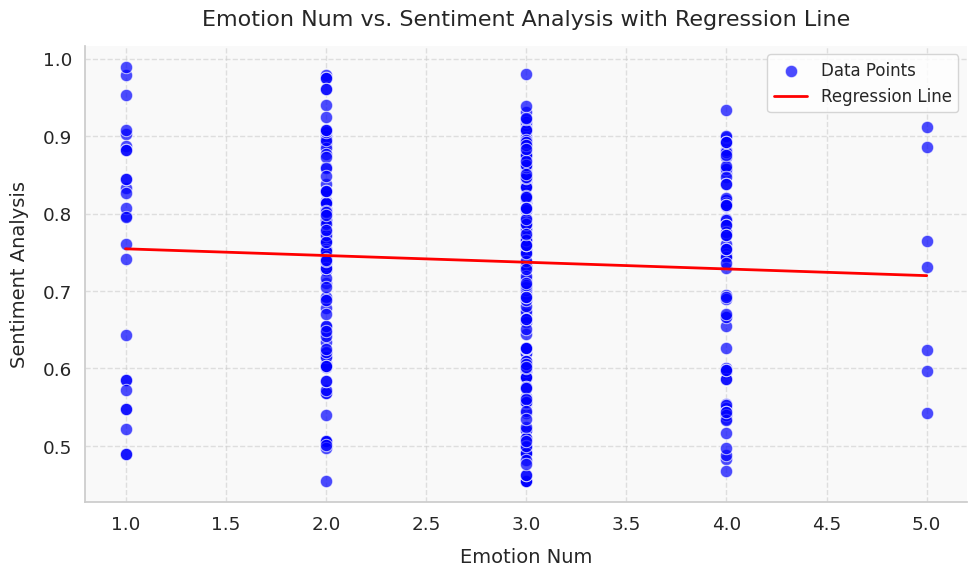

In [ ]:
regression_plot(data=df_combined, x='emotion_num', y='sentiment_analysis')

# Ideas of Analysis:



*   Dream Content
 *  Emotion label
 *  Sentence/word count
 *  sentiment_analysis

*   Similiarty Score between Dream Content and Video Content
*   Video Emotional label





# Methods of Analysis:

Will in life experience will influence dream emotion and context?

Dependent Variable ~ Independent Variables

Does the film impact dream content:

Emotion of Dream ~ Type of Film - See if there is a strong relationship
* Existing work says that film content affects dream content, why we think this is true or false?

Similiarty score of the dream content vs the Film Content - See if there is similiarty of the dream and film

* Why our analysis uses advance methods

The pariticipate that spend a lot of time on the film, but surounding impact.


# Notes 12/5/2024

- Read paper: https://langcog.stanford.edu/papers_new/lewis-2015-underrev.pdf
to justify that sentence/word count represents cognative complexity

- Figure out analysis with variables:

*  Dependent Variable:
 * Emotional Label of the Dream
 * Sentence count of the Dream
 * Sentiment of the Dream

*  Independent Variables:
 * Type of Movie
 * Sentiment of the Movie Description
 * Length of Movie Description
 * Length of the Movie in Minutes

Additional Research task:

*   Figure out the data discrepancy issues between chatGPT and our workout
*   Clean up code
*   Change the number of sentences to the number of words



What analysis do you want to look at? And what do they study?

                            OLS Regression Results                            
Dep. Variable:            emotion_num   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                    0.4166
Date:                Fri, 03 Jan 2025   Prob (F-statistic):              0.519
Time:                        21:04:57   Log-Likelihood:                -585.97
No. Observations:                 464   AIC:                             1176.
Df Residuals:                     462   BIC:                             1184.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.8363      0.054     52.495      0.0

<ipython-input-35-6aeebfe22039>:35: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y_values = fitted_model.params[0] + fitted_model.params[1] * x_values  # Intercept + Slope*x


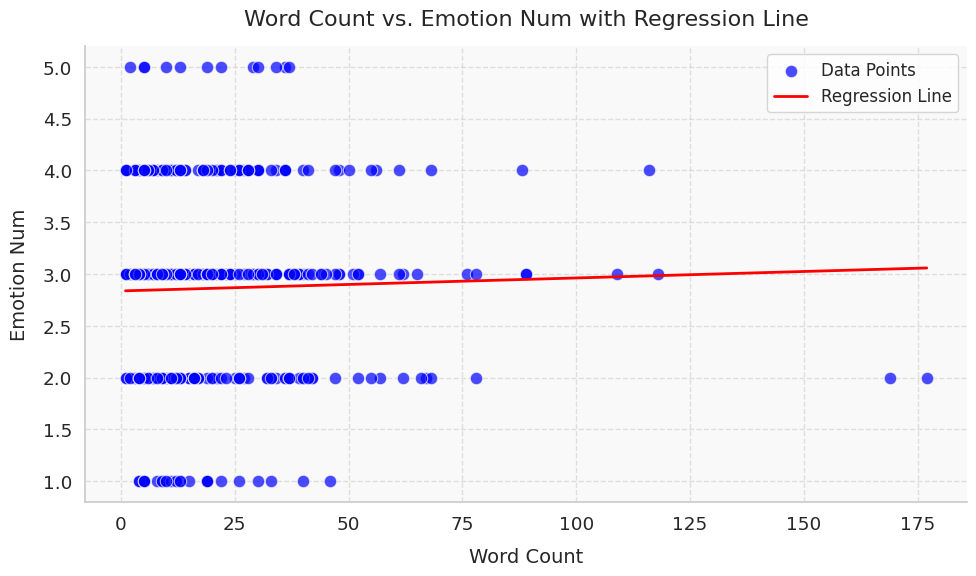

In [ ]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.formula.api import ols

def regression_plot(data, x, y, figsize=(10, 6), scatter_color='blue', line_color='red', theme='whitegrid', font_scale=1.2):
    """
    Create a scatter plot with a regression line for specified x and y variables with enhanced visuals.

    Parameters:
        data (DataFrame): The DataFrame containing the data.
        x (str): The name of the column to use for the x-axis.
        y (str): The name of the column to use for the y-axis.
        figsize (tuple): The size of the plot (width, height).
        scatter_color (str): Color for the scatter plot points.
        line_color (str): Color for the regression line.
        theme (str): Seaborn theme for the plot (e.g., 'whitegrid', 'darkgrid', 'ticks').
        font_scale (float): Scale factor for the font size.

    Returns:
        None
    """
    # Apply seaborn theme and font scale
    sns.set_theme(style=theme)
    sns.set_context("notebook", font_scale=font_scale)

    # Fit the regression model
    formula = f'{y} ~ {x}'
    model = ols(formula, data=data)
    fitted_model = model.fit()
    print(fitted_model.summary())  # Display the summary of the regression model

    # Generate regression line values
    x_values = np.linspace(data[x].min(), data[x].max(), 100)
    y_values = fitted_model.params[0] + fitted_model.params[1] * x_values  # Intercept + Slope*x

    # Plot the data
    plt.figure(figsize=figsize)

    # Scatter plot of actual data points
    sns.scatterplot(x=x, y=y, data=data, color=scatter_color, s=80, alpha=0.7, label='Data Points')

    # Regression line
    plt.plot(x_values, y_values, color=line_color, linewidth=2, label='Regression Line')

    # Customize the plot
    plt.xlabel(x.replace('_', ' ').title(), fontsize=14, labelpad=10)
    plt.ylabel(y.replace('_', ' ').title(), fontsize=14, labelpad=10)
    plt.title(f'{x.replace("_", " ").title()} vs. {y.replace("_", " ").title()} with Regression Line',
              fontsize=16, pad=15)
    plt.legend(fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.6)

    # Add a subtle background gradient for style
    plt.gca().set_facecolor('#f9f9f9')
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)

    # Show the plot
    plt.tight_layout()
    plt.show()

# Example usage
regression_plot(data=df_emotion, x='word_count', y='emotion_num')


# Homework 1/3/2025: Linear Regression Analysis

Use built in function:
regression_plot(data=df_emotion, x='word_count', y='emotion_num')

To analyze the variables of your interest. You should be using the following:


*   df_combined - for the dataset
*   And different X and Y variables

An example is below



                            OLS Regression Results                            
Dep. Variable:     sentiment_analysis   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     1.257
Date:                Sat, 04 Jan 2025   Prob (F-statistic):              0.263
Time:                        03:27:44   Log-Likelihood:                 246.78
No. Observations:                 412   AIC:                            -489.6
Df Residuals:                     410   BIC:                            -481.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       0.7631      0.023     33.684      

<ipython-input-21-6aeebfe22039>:35: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y_values = fitted_model.params[0] + fitted_model.params[1] * x_values  # Intercept + Slope*x


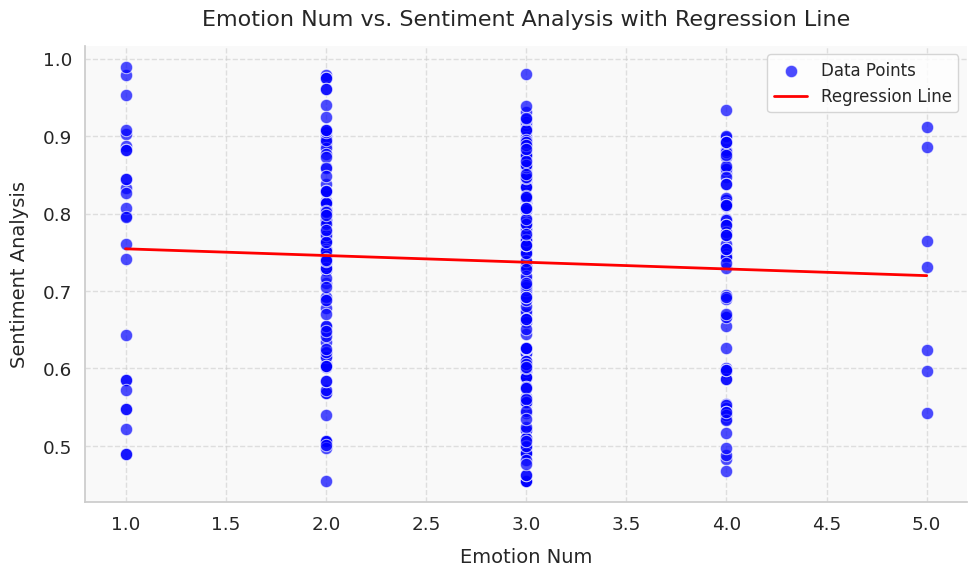

In [ ]:
regression_plot(data=df_combined, x='emotion_num', y='sentiment_analysis')